# In this notebook I will load my model and evaluate it with a new input

In [1]:
from sklearn.metrics import mean_squared_error

<hr>

## Functions that I'll use in this notebook

In [2]:
from myfunctions import *

### Read the new input dataset


In [3]:
DATASET_PATH = "../data/new_input.csv"

In [4]:
print(os.path.exists(DATASET_PATH))

True


In [5]:
# Load the data  
ds_new = pd.read_csv(DATASET_PATH) 

In [6]:
ds_new.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [7]:
ds_new.shape

(319, 25)

## Feature engineering 

In [8]:
cols_to_del = load_del_cols()

In [9]:
print("Deleting columns:\n" + str(cols_to_del))

Deleting columns:
['Description', 'Name', 'Beer Name (Full)', 'Min IBU', 'Max IBU', 'number_of_reviews', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'Alcohol', 'Body', 'Bitter', 'Fruits', 'Brewery']


In [10]:
for col in cols_to_del:
    drop_column(ds_new, col)

<hr>

#### Outlier Engineering

In [11]:
# Load the outlier parameters  
outlier_params = load_outliers() 

In [12]:
# Remove outliers from the new data  
outlier_columns = outlier_params['columns']  
threshold = outlier_params['threshold']
print(f"Columns with outliers:\n{outlier_columns}\n\nThreshold: {threshold}")

Columns with outliers:
['Sweet', 'Sour', 'Hoppy', 'Spices', 'Malty']

Threshold: 4


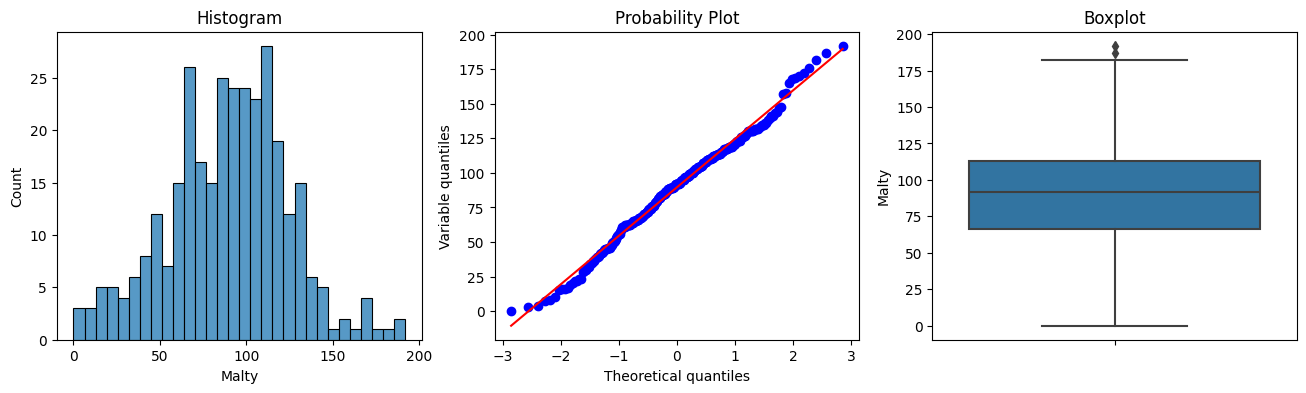

In [13]:
diagnostic_plots(ds_new, 'Malty')

In [14]:
ds_new = ds_new[(np.abs(stats.zscore(ds_new[outlier_columns])) < threshold).all(axis=1)]  

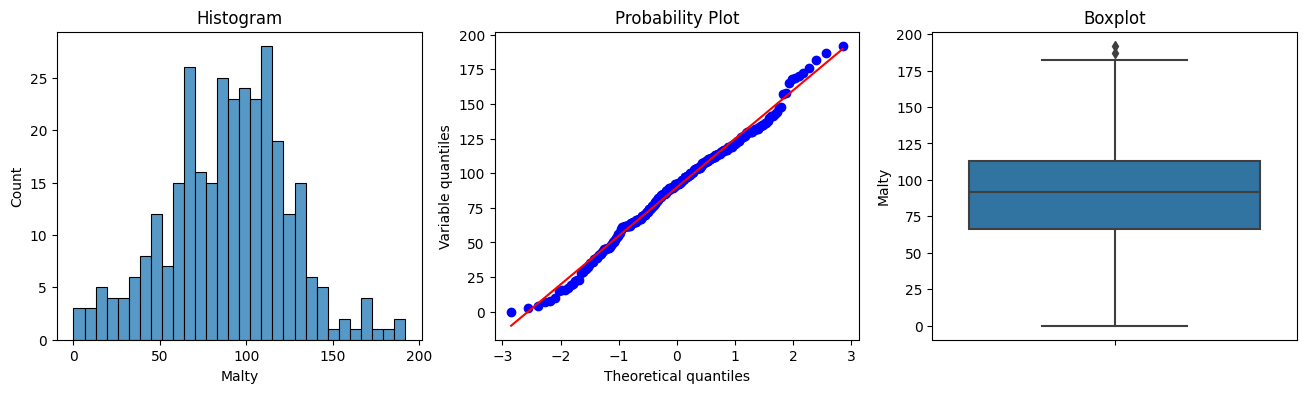

In [15]:
diagnostic_plots(ds_new, 'Malty')

In [16]:
ds_new.shape

(316, 10)

<hr>

#### Categorical encoding

In [17]:
encoding_map = load_categorical_encoding()

In [18]:
for column in encoding_map.keys():
    ds_new.loc[:, column] = ds_new[column].map(encoding_map[column])  

<hr>

#### Normalisation

In [19]:
scaler = load_scaler()

In [20]:
# Specify the columns to scale (all columns except 'review_overall')  
columns_to_scale = [col for col in ds_new.columns if col != 'review_overall']  

In [21]:
ds_scaled = scaler.transform(ds_new[columns_to_scale]) 

In [22]:
# Create a new DataFrame with the scaled data  
df_scaled = pd.DataFrame(ds_scaled, columns=columns_to_scale)    

In [23]:
# Copy the 'review_overall' column from the original DataFrame  
df_scaled['review_overall'] = ds_new['review_overall'].values  
ds = df_scaled
# Now df_scaled is a DataFrame with all columns scaled except 'class'  
np.round(ds.describe(), 1)

,Style,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
count,16.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0
mean,0.0,0.3,0.2,0.4,0.2,0.0,0.4,0.1,0.4,3.8
std,0.0,0.2,0.1,0.2,0.1,0.0,0.2,0.1,0.2,0.3
min,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8
25%,0.0,0.2,0.1,0.3,0.1,0.0,0.2,0.1,0.3,3.7
50%,0.0,0.2,0.2,0.4,0.2,0.0,0.4,0.1,0.4,3.8
75%,0.0,0.3,0.3,0.5,0.2,0.0,0.5,0.1,0.5,4.0
max,0.0,2.1,0.6,1.2,0.6,0.2,1.1,0.4,0.9,4.5


<hr>

# Model import

In [24]:
#from sklearn.ensemble import RandomForestClassifier  
  
# Load the model  
model = load_model("../models/catBoostRegr.joblib")  

In [25]:
y_column = ds.columns[-1]
X_columns = ds.columns[:-1]

print("Target variable: " + str(y_column))
print("Features: " + str(X_columns))

Target variable: review_overall
Features: Index(['Style', 'ABV', 'Astringency', 'Sweet', 'Sour', 'Salty', 'Hoppy',
       'Spices', 'Malty'],
      dtype='object')


In [26]:
# Split the data into target variable and attributes  
X = ds_new[X_columns]  
y = ds_new[y_column]  

In [27]:
# Use the model to predict the target variable  
y_pred = model.predict(X)  
  
print('test set metrics: \n', mean_squared_error(y, y_pred))

test set metrics: 
 0.0819889600576484
